#### Pandas Tutorial - Part 59: DataFrame Methods (cumsum, describe, equals, eval)

This notebook covers several important DataFrame methods including:
- `cumsum()` - Return cumulative sum over a DataFrame axis
- `describe()` - Generate descriptive statistics
- `equals()` - Test whether two objects contain the same elements
- `eval()` - Evaluate a string describing operations on DataFrame columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

##### 1. DataFrame.cumsum()

The `cumsum()` method returns the cumulative sum over a DataFrame or Series axis.

In [2]:
# Create a Series with some values
s = pd.Series([2, np.nan, 5, -1, 0])
print("Original Series:")
s

Original Series:


0    2.0
1    NaN
2    5.0
3   -1.0
4    0.0
dtype: float64

In [3]:
# Calculate cumulative sum (by default, NA values are ignored)
print("Cumulative sum (skipna=True):")
s.cumsum()

Cumulative sum (skipna=True):


0    2.0
1    NaN
2    7.0
3    6.0
4    6.0
dtype: float64

In [4]:
# Calculate cumulative sum including NA values
print("Cumulative sum (skipna=False):")
s.cumsum(skipna=False)

Cumulative sum (skipna=False):


0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [5]:
# Create a DataFrame with some values
df = pd.DataFrame([
    [2.0, 1.0],
    [3.0, np.nan],
    [1.0, 0.0]
], columns=list('AB'))
print("Original DataFrame:")
df

Original DataFrame:


,A,B
0,2.0,1.0
1,3.0,NaN
2,1.0,0.0


In [6]:
# Calculate cumulative sum along index (rows)
print("Cumulative sum along index (axis=0):")
df.cumsum()

Cumulative sum along index (axis=0):


,A,B
0,2.0,1.0
1,5.0,NaN
2,6.0,1.0


In [7]:
# Calculate cumulative sum along columns
print("Cumulative sum along columns (axis=1):")
df.cumsum(axis=1)

Cumulative sum along columns (axis=1):


,A,B
0,2.0,3.0
1,3.0,NaN
2,1.0,1.0


In [8]:
# Create a DataFrame with more data
df2 = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [-1, -2, -3, -4, -5]
})
print("DataFrame with more data:")
print(df2)

print("\nCumulative sum along index:")
print(df2.cumsum())

DataFrame with more data:
   A   B  C
0  1  10 -1
1  2  20 -2
2  3  30 -3
3  4  40 -4
4  5  50 -5

Cumulative sum along index:
    A    B   C
0   1   10  -1
1   3   30  -3
2   6   60  -6
3  10  100 -10
4  15  150 -15


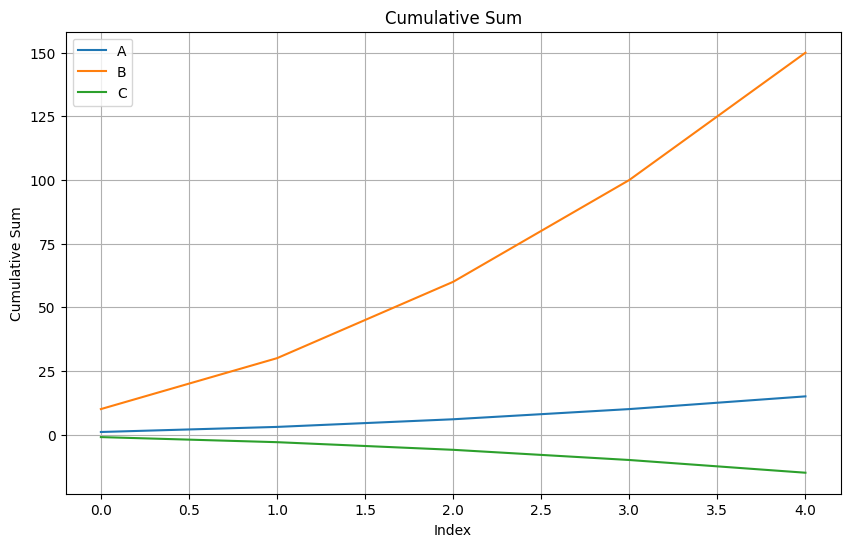

In [9]:
# Visualize the cumulative sum
df2.cumsum().plot(figsize=(10, 6))
plt.title('Cumulative Sum')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.grid(True)
plt.show()

##### 2. DataFrame.describe()

The `describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.

In [10]:
# Create a DataFrame with numeric data
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [10, 20, 30, 40, 50],
    'C': [100, 50, 10, 20, 30]
})
print("DataFrame with numeric data:")
df

DataFrame with numeric data:


,A,B,C
0,1,10,100
1,2,20,50
2,3,30,10
3,4,40,20
4,5,50,30


In [11]:
# Generate descriptive statistics
print("Descriptive statistics:")
df.describe()

Descriptive statistics:


,A,B,C
count,5.000000,5.000000,5.000000
mean,3.000000,30.000000,42.000000
std,1.581139,15.811388,35.637059
min,1.000000,10.000000,10.000000
25%,2.000000,20.000000,20.000000
50%,3.000000,30.000000,30.000000
75%,4.000000,40.000000,50.000000
max,5.000000,50.000000,100.000000


In [12]:
# Create a DataFrame with mixed data types
df_mixed = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': ['a', 'b', 'c', 'd', 'e'],
    'C': [True, False, True, True, False],
    'D': pd.date_range('20200101', periods=5)
})
print("DataFrame with mixed data types:")
df_mixed

DataFrame with mixed data types:


,A,B,C,D
0,1,a,True,2020-01-01
1,2,b,False,2020-01-02
2,3,c,True,2020-01-03
3,4,d,True,2020-01-04
4,5,e,False,2020-01-05


In [13]:
# By default, describe() only includes numeric columns
print("Default describe() (numeric columns only):")
df_mixed.describe()

Default describe() (numeric columns only):


,A,D
count,5.000000,5
mean,3.000000,2020-01-03 00:00:00
min,1.000000,2020-01-01 00:00:00
25%,2.000000,2020-01-02 00:00:00
50%,3.000000,2020-01-03 00:00:00
75%,4.000000,2020-01-04 00:00:00
max,5.000000,2020-01-05 00:00:00
std,1.581139,NaN


In [14]:
# Include all columns
print("describe() with include='all':")
df_mixed.describe(include='all')

describe() with include='all':


,A,B,C,D
count,5.000000,5,5,5
unique,NaN,5,2,NaN
top,NaN,a,True,NaN
freq,NaN,1,3,NaN
mean,3.000000,NaN,NaN,2020-01-03 00:00:00
min,1.000000,NaN,NaN,2020-01-01 00:00:00
25%,2.000000,NaN,NaN,2020-01-02 00:00:00
50%,3.000000,NaN,NaN,2020-01-03 00:00:00
75%,4.000000,NaN,NaN,2020-01-04 00:00:00
max,5.000000,NaN,NaN,2020-01-05 00:00:00


In [15]:
# Include only object columns
print("describe() with include=['object']:")
df_mixed.describe(include=['object'])

describe() with include=['object']:


,B
count,5
unique,5
top,a
freq,1


In [16]:
# Include only numeric columns (explicitly)
print("describe() with include=[np.number]:")
df_mixed.describe(include=[np.number])

describe() with include=[np.number]:


,A
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [17]:
# Exclude numeric columns
print("describe() with exclude=[np.number]:")
df_mixed.describe(exclude=[np.number])

describe() with exclude=[np.number]:


,B,C,D
count,5,5,5
unique,5,2,NaN
top,a,True,NaN
freq,1,3,NaN
mean,NaN,NaN,2020-01-03 00:00:00
min,NaN,NaN,2020-01-01 00:00:00
25%,NaN,NaN,2020-01-02 00:00:00
50%,NaN,NaN,2020-01-03 00:00:00
75%,NaN,NaN,2020-01-04 00:00:00
max,NaN,NaN,2020-01-05 00:00:00


In [18]:
# Customize percentiles
print("describe() with custom percentiles:")
df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

describe() with custom percentiles:


,A,B,C
count,5.000000,5.000000,5.000000
mean,3.000000,30.000000,42.000000
std,1.581139,15.811388,35.637059
min,1.000000,10.000000,10.000000
5%,1.200000,12.000000,12.000000
25%,2.000000,20.000000,20.000000
50%,3.000000,30.000000,30.000000
75%,4.000000,40.000000,50.000000
95%,4.800000,48.000000,90.000000
max,5.000000,50.000000,100.000000


##### 3. DataFrame.equals()

The `equals()` method tests whether two objects contain the same elements.

In [19]:
# Create a DataFrame
df = pd.DataFrame({1: [10], 2: [20]})
print("Original DataFrame:")
df

Original DataFrame:


,1,2
0,10,20


In [20]:
# Create an identical DataFrame
exactly_equal = pd.DataFrame({1: [10], 2: [20]})
print("Identical DataFrame:")
exactly_equal

# Test equality
print("\nAre they equal?", df.equals(exactly_equal))

Identical DataFrame:

Are they equal? True


In [21]:
# Create a DataFrame with different column types but same values
different_column_type = pd.DataFrame({1.0: [10], 2.0: [20]})
print("DataFrame with different column types:")
different_column_type

# Test equality
print("\nAre they equal?", df.equals(different_column_type))

DataFrame with different column types:

Are they equal? True


In [22]:
# Create a DataFrame with different data types
different_data_type = pd.DataFrame({1: [10.0], 2: [20.0]})
print("DataFrame with different data types:")
different_data_type

# Test equality
print("\nAre they equal?", df.equals(different_data_type))

DataFrame with different data types:

Are they equal? False


In [23]:
# Create a DataFrame with different values
different_values = pd.DataFrame({1: [11], 2: [20]})
print("DataFrame with different values:")
different_values

# Test equality
print("\nAre they equal?", df.equals(different_values))

DataFrame with different values:

Are they equal? False


In [24]:
# Create a DataFrame with different index
different_index = pd.DataFrame({1: [10], 2: [20]}, index=[1])
print("DataFrame with different index:")
different_index

# Test equality
print("\nAre they equal?", df.equals(different_index))

DataFrame with different index:

Are they equal? False


In [25]:
# Test equality with Series
s1 = pd.Series([1, 2, 3])
s2 = pd.Series([1, 2, 3])
s3 = pd.Series([1, 2, 4])

print("s1 equals s2:", s1.equals(s2))
print("s1 equals s3:", s1.equals(s3))

s1 equals s2: True
s1 equals s3: False


##### 4. DataFrame.eval()

The `eval()` method evaluates a string describing operations on DataFrame columns.

In [26]:
# Create a DataFrame
df = pd.DataFrame({
    'A': range(1, 6),
    'B': range(10, 60, 10),
    'C': range(100, 600, 100)
})
print("Original DataFrame:")
df

Original DataFrame:


,A,B,C
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


In [27]:
# Simple arithmetic expression
print("A + B:")
df.eval('A + B')

A + B:


0    11
1    22
2    33
3    44
4    55
dtype: int64

In [28]:
# More complex expression
print("A + B * C:")
df.eval('A + B * C')

A + B * C:


0     1001
1     4002
2     9003
3    16004
4    25005
dtype: int64

In [29]:
# Comparison expression
print("A < B:")
df.eval('A < B')

A < B:


0    True
1    True
2    True
3    True
4    True
dtype: bool

In [30]:
# Assignment expression (create a new column)
print("Create new column 'D' = A + B:")
df.eval('D = A + B', inplace=True)
df

Create new column 'D' = A + B:


,A,B,C,D
0,1,10,100,11
1,2,20,200,22
2,3,30,300,33
3,4,40,400,44
4,5,50,500,55


In [31]:
# Assignment expression (modify existing column)
print("Modify column 'D' = A * B:")
df.eval('D = A * B', inplace=True)
df

Modify column 'D' = A * B:


,A,B,C,D
0,1,10,100,10
1,2,20,200,40
2,3,30,300,90
3,4,40,400,160
4,5,50,500,250


In [32]:
# Using local variables in the expression
x = 10
print(f"Using local variable x = {x}:")
df.eval('A + @x')

Using local variable x = 10:


0    11
1    12
2    13
3    14
4    15
Name: A, dtype: int64

In [33]:
# Multiple expressions separated by semicolons
print("Multiple expressions:")
df.eval("""
E = A + C
F = B - A
""", inplace=True)
df

Multiple expressions:


,A,B,C,D,E,F
0,1,10,100,10,101,9
1,2,20,200,40,202,18
2,3,30,300,90,303,27
3,4,40,400,160,404,36
4,5,50,500,250,505,45


In [34]:
# Using boolean operators
print("Boolean expression:")
df.eval('(A > 3) & (B < 50)')

Boolean expression:


0    False
1    False
2    False
3     True
4    False
dtype: bool

##### Summary

In this notebook, we've explored several important DataFrame methods:

1. **cumsum()**: Returns the cumulative sum over a DataFrame or Series axis
2. **describe()**: Generates descriptive statistics summarizing the central tendency, dispersion, and shape of a dataset's distribution
3. **equals()**: Tests whether two objects contain the same elements
4. **eval()**: Evaluates a string describing operations on DataFrame columns

These methods are essential for calculating cumulative statistics, understanding data distributions, comparing data structures, and performing operations on DataFrame columns in pandas.